<a href="https://colab.research.google.com/github/ShineySun/KalmanFilter_2019/blob/master/moving_avg_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이동 평균 필터(Moving Average Filter)
#### 모든 측정 데이터가 아닌, 지정된 개수의 최근 측정값만 가지고 계산한 평균
#### 새로운 데이터가 들어오면 기존의 것을 버리는 방식으로 데이터 개수를 일정하게 유지하면서 평균을 구한다.


In [0]:
from scipy import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# read mat file
mat_file = io.loadmat('SonarAlt.mat')

In [51]:
#mat_file = np.array(mat_file)
# read mat file 
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'sonarAlt'])

In [52]:
mat_file['sonarAlt'][0]

array([34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
       36.55540305, 36.55540305])

In [53]:
max = len(mat_file['sonarAlt'][0])
print(max)

1501


In [78]:
#x = np.linspace(0,max,max-1)
x = np.arange(max)
print(x)

[   0    1    2 ... 1498 1499 1500]


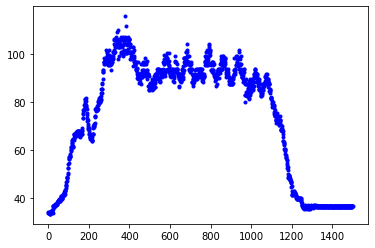

In [80]:
plt.figure(1)
plt.plot(x,mat_file['sonarAlt'][0][0:max],'b.')

In [0]:
import queue

n_size = 6
data_queue = queue.Queue(n_size)

for i in range(0,n_size):
  data_queue.put(mat_file['sonarAlt'][0][0])

avg = mat_file['sonarAlt'][0][0]
pre_avg = mat_file['sonarAlt'][0][0]

def moving_average_filter(x):
  global avg
  global data_queue
  global pre_avg
  global n_size

  xk_1 = data_queue.get()
  data_queue.put(x)
  
  avg = pre_avg + (x-xk_1)/n_size
  pre_avg = avg
  
  return avg


In [0]:
avgs = np.zeros(max)
avgs[0] = avg

for i in range(1,max):
  avgs[i] = moving_average_filter(mat_file['sonarAlt'][0][i])
  



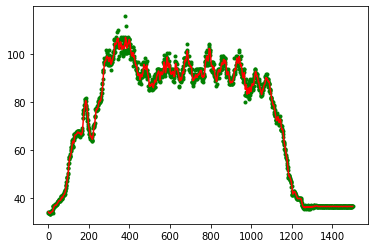

In [90]:
plt.plot(x,mat_file['sonarAlt'][0][0:max],'g.')
plt.plot(x,avgs,'r-')